# Training Latent Graph Autoencoder

In [93]:
import torchvision
import torch
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data.dataloader import DataLoader
from graph_autoencoder import LatentGraphVAE
import matplotlib.pyplot as plt
import numpy as np

In [42]:
device = 'cuda:1'

In [43]:
transforms = Compose([
    ToTensor(),
    Resize((320//2, 480//2))
    ])
dataset = torchvision.datasets.ImageFolder('data/CLEVR_v1.0/images/', transform=transforms)
dataloader = DataLoader(dataset=dataset, batch_size=1)

AttributeError: 'ImageFolder' object has no attribute 'to'

In [40]:
# Number of parameters in the model
print(sum(p.numel() for p in lgvae.parameters() if p.requires_grad))

241680774


In [95]:
lgvae = LatentGraphVAE(n_channels=3, w=320//2, h=480//2, device=device).to(device)
optim = torch.optim.Adam(params=lgvae.parameters())

optim.zero_grad()
batch_size = 10
n_epochs = 1
i=0
batch_loss = 0
checkpoint = 100

tmstp = '20221201_1342'

for epoch in range(n_epochs):
    i=0
    for image,_ in dataloader:
        image = image.squeeze(0).to(device)
        nodes = lgvae(image)
        recon = nodes.sum(dim=0)
        loss = torch.mean((recon - image)**2)
        loss.backward()
        batch_loss += float(loss)
        i+=1
        if i%batch_size==0:
            optim.step()
            optim.zero_grad()
            print(f"epoch={epoch:4d} n={i:8d} loss={batch_loss:8.4f}", flush=True)
            batch_loss = 0
        if i%checkpoint==0:
            torch.save(lgvae.state_dict(), f'models/lgvae_{tmstp}.torch')

epoch=   0 n=      10 loss=118.0295
epoch=   0 n=      20 loss= 57.7773
epoch=   0 n=      30 loss= 50.2772
epoch=   0 n=      40 loss= 48.9127
epoch=   0 n=      50 loss= 17.6553
epoch=   0 n=      60 loss= 19.2035
epoch=   0 n=      70 loss=  7.1164
epoch=   0 n=      80 loss=  5.1892
epoch=   0 n=      90 loss=  2.7321
epoch=   0 n=     100 loss=  2.1633
epoch=   0 n=     110 loss=  2.0897
epoch=   0 n=     120 loss=  2.3043
epoch=   0 n=     130 loss=  2.1982
epoch=   0 n=     140 loss=  1.8228
epoch=   0 n=     150 loss=  1.4360
epoch=   0 n=     160 loss=  1.2951
epoch=   0 n=     170 loss=  1.1449
epoch=   0 n=     180 loss=  0.9072
epoch=   0 n=     190 loss=  0.7572
epoch=   0 n=     200 loss=  0.6989
epoch=   0 n=     210 loss=  0.6443
epoch=   0 n=     220 loss=  0.5971
epoch=   0 n=     230 loss=  0.5676
epoch=   0 n=     240 loss=  0.5150
epoch=   0 n=     250 loss=  0.4234
epoch=   0 n=     260 loss=  0.3697
epoch=   0 n=     270 loss=  0.3790
epoch=   0 n=     280 loss= 

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


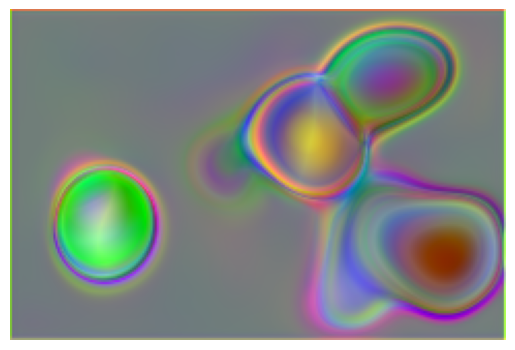

In [114]:
nprecon = recon.detach().cpu().numpy()
plt.axis('off')
plt.imshow(np.transpose(nprecon, (1,2,0)))

In [129]:
node_np[:,:,0].shape

(160, 240)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


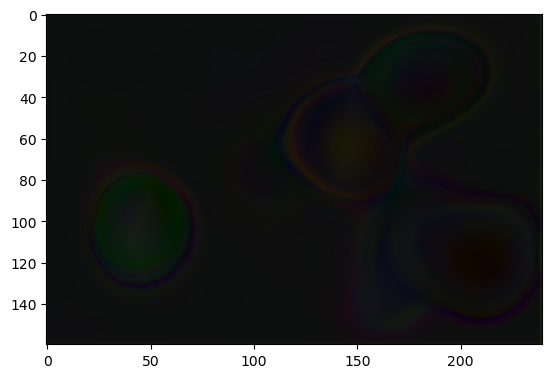

In [136]:
plt.imshow(node_np, interpolation='none')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


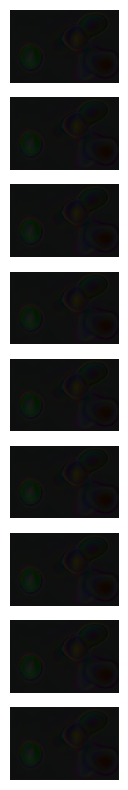

In [126]:
n_nodes = nodes.shape[0]
fig, axs = plt.subplots(n_nodes+1, figsize=(40,10))
for i in range(n_nodes):
    node_np = nodes[i].detach().cpu().numpy()
    node_np = np.transpose(node_np, (1,2,0))
    axs[i].axis('off')
    axs[i].imshow(node_np, interpolation='none')
axs[n_nodes].axis('off')
axs[n_nodes].imshow(node_np)